In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime

In [2]:
df_hosp = pd.read_excel('HospitalDatabase.xlsx',sheet_name = None)
pats=df_hosp['Patients']
ed_visits=df_hosp['EDVisits']
amb_visits=df_hosp['AmbulatoryVisits']
re_adm=df_hosp['ReAdmissionRegistry']
discharges=df_hosp['Discharges']
providers=df_hosp['Providers']
ed_unique=df_hosp['EDUnique']

# 1.Create a stacked bar chart for patients with age and gender using bins for age.

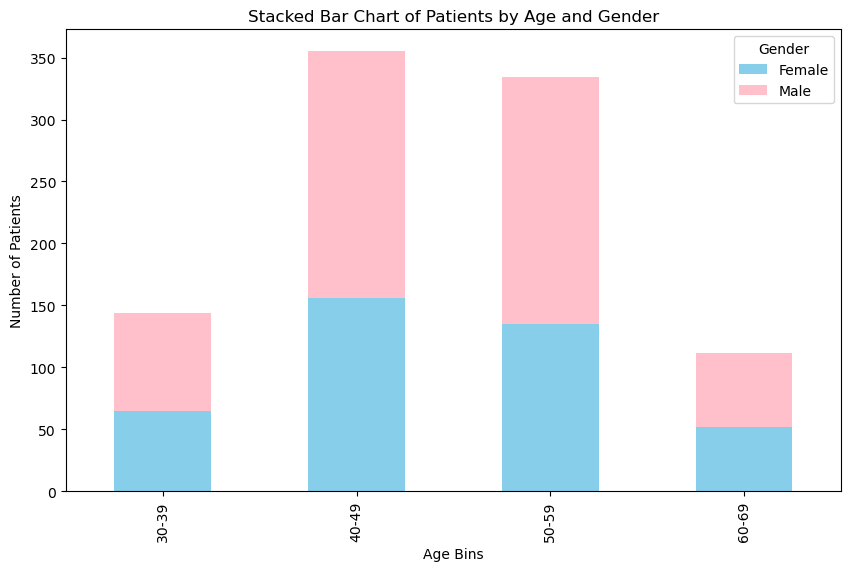

In [3]:
# Calculate age from date of birth
current_year = datetime.now().year
pats['Age'] = current_year - pd.DatetimeIndex(pats['DateOfBirth']).year

# Create age bins
age_bins = [10 * i for i in range(3, 8)]  # Create bins: 30, 40, ..., 70
pats['AgeBin'] = pd.cut(pats['Age'], bins=age_bins, labels=[f'{i}-{i+9}' for i in age_bins[:-1]])

# Group data by age bins and gender
grouped_data = pats.groupby(['AgeBin', 'Gender']).size().unstack()

# Plot a stacked bar chart with custom colors
colors = ['skyblue', 'pink']
ax = grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
ax.set_xlabel('Age Bins')
ax.set_ylabel('Number of Patients')
ax.set_title('Stacked Bar Chart of Patients by Age and Gender')
ax.legend(title='Gender', loc='upper right')

plt.show()



# 2.Which reason for visit are discharged the most.

In [4]:
# Filter data where EDDisposition is "discharge"
discharged_visits = ed_visits[ed_visits['EDDisposition'] == 'Discharged']

# Group data by ReasonForVisit and calculate the count
reason_counts = discharged_visits['ReasonForVisit'].value_counts()

# Get the most common ReasonForVisit
most_common_reason = reason_counts.idxmax()

print(f"The most common Discharged reason for Visit is: {most_common_reason}")


The most common Discharged reason for Visit is: Fever


# 4.Using iloc display full details of the longest stayed patient.

In [5]:
# Convert columns to datetime data types
ed_visits['EDDischargeTime'] = pd.to_datetime(ed_visits['EDDischargeTime'])
ed_visits['VisitDate'] = pd.to_datetime(ed_visits['VisitDate'])

ed_visits['StayDuration'] = ed_visits['EDDischargeTime'] - ed_visits['VisitDate']

index_longest_stay = ed_visits['StayDuration'].idxmax()

# Use .iloc
longest_stay_details = ed_visits.iloc[index_longest_stay]

# Extract hours, minutes, and seconds from the Timedelta object
stay_duration = longest_stay_details['StayDuration']
hours = stay_duration.seconds // 3600
minutes = (stay_duration.seconds % 3600) // 60
seconds = stay_duration.seconds % 60

print("Details of the longest stay:")
print(f"Stay Duration: {hours} hours, {minutes} minutes, {seconds} seconds")
print("Complete Details:")
print(longest_stay_details.drop('StayDuration'))

Details of the longest stay:
Stay Duration: 23 hours, 59 minutes, 43 seconds
Complete Details:
EDVisitID                                1143
PatientID                                 889
VisitDate          2020-01-14 21:28:14.588000
EDDischargeTime    2020-01-15 21:27:58.579000
Acuity                                      2
ReasonForVisit                      Pneumonia
EDDisposition                        Admitted
Name: 486, dtype: object


# 3.Plot ExpectedLOS based on Primary Diagnosis

C:\Users\Amitha\AppData\Local\Temp\ipykernel_34860\54216006.py:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  normalized_los = normalized_los.append(pd.Series([normalized_los.iloc[0]], index=[normalized_los.index[-1]]))


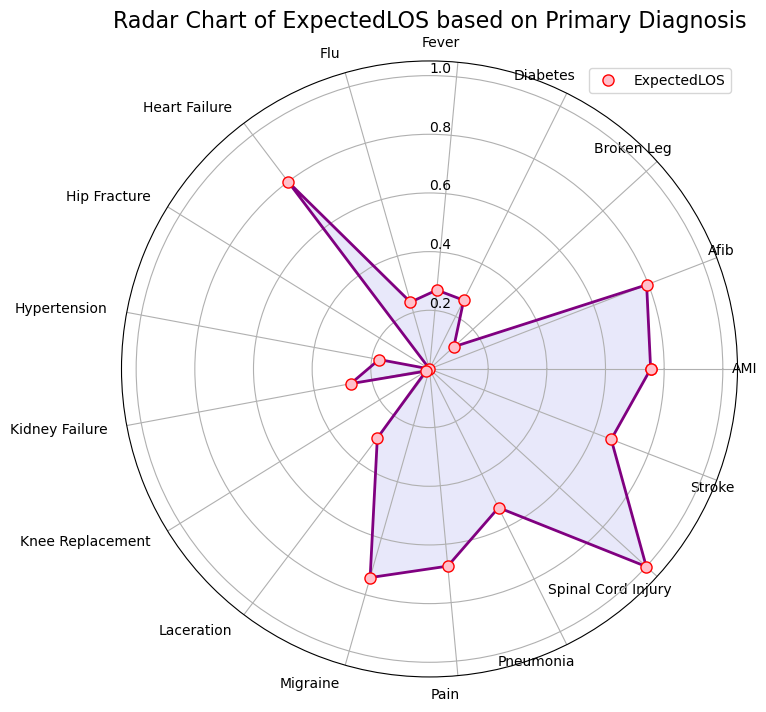

In [6]:
# Group data by Primary Diagnosis and calculate mean ExpectedLOS
diagnosis_los = re_adm.groupby('PrimaryDiagnosis')['ExpectedLOS'].mean()

diagnoses = diagnosis_los.index.tolist()

normalized_los = (diagnosis_los - diagnosis_los.min()) / (diagnosis_los.max() - diagnosis_los.min())

normalized_los = normalized_los.append(pd.Series([normalized_los.iloc[0]], index=[normalized_los.index[-1]]))

# Create angles for the radar chart
angles = np.linspace(0, 2 * np.pi, len(diagnoses) + 1)

# Plot the radar chart
plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)
ax.fill(angles, normalized_los, color='lavender', alpha=0.9)
ax.plot(angles, normalized_los, color='purple', linewidth=2)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(diagnoses, ha='right')

# Manually adjust the radial position of tick labels
ax.set_rlabel_position(90)
ax.set_title('Radar Chart of ExpectedLOS based on Primary Diagnosis', fontsize=16)
ax.plot(angles, normalized_los, 'o', markersize=8, color='red', markerfacecolor='pink', label='ExpectedLOS')
ax.legend(loc='upper right')

plt.show()

# 4:Machine Learning

In [7]:
#Merging
merged_pats_ed_visits = pd.merge(pats, ed_visits, on='PatientID', how='inner')

merged_pats_ed_ambulatory = pd.merge(merged_pats_ed_visits, amb_visits, left_on='PatientID', right_on='PatientMRN', how='inner')

final_merged_data = pd.merge(merged_pats_ed_ambulatory, re_adm, on='PatientID', how='inner')

In [8]:
final_merged_data

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeBin,EDVisitID,...,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61,60-69,5,...,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
1,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,61,60-69,96,...,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
2,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,54,50-59,6,...,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
3,6,Jerrilyn,Kane,1969-03-30 09:36:56.550,Male,White,English,54,50-59,97,...,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
4,7,Skipton,Bar,1975-11-25 22:23:53.525,Male,White,English,48,40-49,7,...,2018-01-01,2018-01-06 13:01:00.276,Home,Hospitalist,Pneumonia,9.555047,0.063634,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,665,Thor,Allder,1971-09-26 19:06:32.777,Male,Black/African-American,English,52,50-59,919,...,2018-02-19,2018-03-01 19:56:09.361,Home,General Medicine,Diabetes,7.889449,0.302267,NaN,NaN,NaN
752,665,Thor,Allder,1971-09-26 19:06:32.777,Male,Black/African-American,English,52,50-59,919,...,2018-02-19,2018-03-01 19:56:09.361,Home,General Medicine,Diabetes,7.889449,0.302267,NaN,NaN,NaN
753,668,Llewellyn,Buckmaster,1984-07-12 06:09:57.840,Male,Black/African-American,English,39,30-39,922,...,2018-02-19,2018-03-02 20:22:26.558,Home,General Medicine,Diabetes,3.811283,0.285069,NaN,NaN,NaN
754,668,Llewellyn,Buckmaster,1984-07-12 06:09:57.840,Male,Black/African-American,English,39,30-39,922,...,2018-02-19,2018-03-02 20:22:26.558,Home,General Medicine,Diabetes,3.811283,0.285069,NaN,NaN,NaN


In [9]:
final_data = final_merged_data[['PatientID', 'DateOfBirth', 'Gender', 'Race', 'Acuity',
                         'BloodPressureSystolic', 'BloodPressureDiastolic',
                         'Pulse', 'ExpectedMortality']]
final_data

,PatientID,DateOfBirth,Gender,Race,Acuity,BloodPressureSystolic,BloodPressureDiastolic,Pulse,ExpectedMortality
0,5,1962-05-01 19:12:58.950,Male,White,1,158.0,116.151006,59.360770,0.307527
1,5,1962-05-01 19:12:58.950,Male,White,2,158.0,116.151006,59.360770,0.307527
2,6,1969-03-30 09:36:56.550,Male,White,1,154.0,98.736556,67.425256,0.408898
3,6,1969-03-30 09:36:56.550,Male,White,1,154.0,98.736556,67.425256,0.408898
4,7,1975-11-25 22:23:53.525,Male,White,1,137.0,85.844944,97.442262,0.063634
...,...,...,...,...,...,...,...,...,...
751,665,1971-09-26 19:06:32.777,Male,Black/African-American,5,NaN,NaN,NaN,0.302267
752,665,1971-09-26 19:06:32.777,Male,Black/African-American,5,174.0,135.919219,66.544841,0.302267
753,668,1984-07-12 06:09:57.840,Male,Black/African-American,3,172.0,105.720900,78.228193,0.285069
754,668,1984-07-12 06:09:57.840,Male,Black/African-American,3,180.0,123.818634,72.088780,0.285069


In [10]:
current_year = datetime.now().year
final_data['Age'] = current_year - pd.to_datetime(final_data['DateOfBirth']).dt.year

# Drop the DateOfBirth column using .loc indexer
final_data = final_data.drop(columns=['DateOfBirth'])

# Display the updated final_data DataFrame
print(final_data.head())



   PatientID Gender   Race  Acuity  BloodPressureSystolic  \
0          5   Male  White       1                  158.0   
1          5   Male  White       2                  158.0   
2          6   Male  White       1                  154.0   
3          6   Male  White       1                  154.0   
4          7   Male  White       1                  137.0   

   BloodPressureDiastolic      Pulse  ExpectedMortality  Age  
0              116.151006  59.360770           0.307527   61  
1              116.151006  59.360770           0.307527   61  
2               98.736556  67.425256           0.408898   54  
3               98.736556  67.425256           0.408898   54  
4               85.844944  97.442262           0.063634   48  


C:\Users\Amitha\AppData\Local\Temp\ipykernel_34860\3714474617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_data['Age'] = current_year - pd.to_datetime(final_data['DateOfBirth']).dt.year


In [11]:
# Find and count null values in final_data
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print(null_counts)

PatientID                   0
Gender                      0
Race                        0
Acuity                      0
BloodPressureSystolic     116
BloodPressureDiastolic    116
Pulse                     116
ExpectedMortality           0
Age                         0
dtype: int64


In [12]:
final_data.dropna(inplace=True) 

In [13]:
# Find and count null values in final_data
null_counts = final_data.isnull().sum()

# Display the count of null values for each column
print(null_counts)

PatientID                 0
Gender                    0
Race                      0
Acuity                    0
BloodPressureSystolic     0
BloodPressureDiastolic    0
Pulse                     0
ExpectedMortality         0
Age                       0
dtype: int64


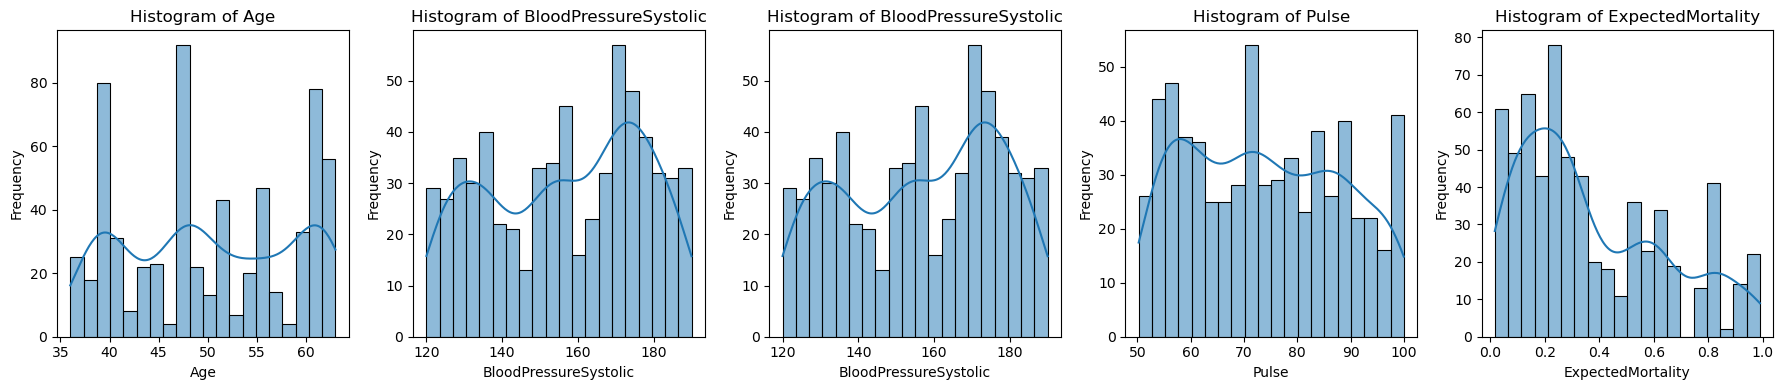

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming final_data is your DataFrame
numeric_columns = ['Age', 'BloodPressureSystolic', 'BloodPressureSystolic', 'Pulse', 'ExpectedMortality']

# Create a histogram plot for numeric columns using subplots
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(18, 4))

for i, column in enumerate(numeric_columns):
    sns.histplot(final_data[column], bins=20, kde=True, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [15]:
from sklearn.model_selection import train_test_split
final_data.dropna(inplace=True)

# Define features (X) and target variable (y)
X = final_data.drop(columns=['ExpectedMortality'])
y = final_data['ExpectedMortality']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the splits
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of X_train: (512, 8)
Shape of X_test: (128, 8)
Shape of y_train: (512,)
Shape of y_test: (128,)


In [16]:
gender_mapping = {'Male': 1, 'Female': 0}
final_data['Gender'] = final_data['Gender'].map(gender_mapping)
race_mapping = {'White': 1, 'Black/African-American': 0}
final_data['Race'] = final_data['Race'].map(race_mapping)

In [17]:
final_data['Gender'] = final_data['Gender'].replace(gender_mapping)
final_data['Race'] = final_data['Race'].replace(race_mapping)


In [18]:
# One-hot encode categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['Gender', 'Race'])
X_test_encoded = pd.get_dummies(X_test, columns=['Gender', 'Race'])

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load and preprocess your data
# Assuming you have loaded your data into X_train, X_test, y_train_binary, y_test_binary
# ...

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

# Fit the encoder on the training data and transform both train and test data
X_train_encoded = encoder.fit_transform(X_train[['Gender', 'Race']])
X_test_encoded = encoder.transform(X_test[['Gender', 'Race']])

# Create a Logistic Regression model
logreg_model = LogisticRegression(random_state=42)

# Train the model on the training data
logreg_model.fit(X_train_encoded, y_train_binary)

# Make predictions on the testing data
logreg_predictions = logreg_model.predict(X_test_encoded)

# Evaluate the Logistic Regression model's performance
logreg_accuracy = accuracy_score(y_test_binary, logreg_predictions)
logreg_classification_rep = classification_report(y_test_binary, logreg_predictions)

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_encoded, y_train_binary)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluate the Random Forest model's performance
rf_accuracy = accuracy_score(y_test_binary, rf_predictions)
rf_classification_rep = classification_report(y_test_binary, rf_predictions)

# Create an SVM model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train_encoded, y_train_binary)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test_encoded)

# Evaluate the SVM model's performance
svm_accuracy = accuracy_score(y_test_binary, svm_predictions)
svm_classification_rep = classification_report(y_test_binary, svm_predictions)

# Print evaluation results for all models
print("Logistic Regression Model Evaluation:")
print("Accuracy:", logreg_accuracy)
print("\nClassification Report:\n", logreg_classification_rep)
print("\n--------------------------------------\n")
print("Random Forest Model Evaluation:")
print("Accuracy:", rf_accuracy)
print("\nClassification Report:\n", rf_classification_rep)
print("\n--------------------------------------\n")
print("SVM Model Evaluation:")
print("Accuracy:", svm_accuracy)
print("\nClassification Report:\n", svm_classification_rep)


NameError: name 'y_train_binary' is not defined

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import category_encoders as ce

# Create an instance of the target encoder
encoder = ce.TargetEncoder(cols=['Gender', 'Race'])

# Fit the encoder on the training data and transform both train and test data
X_train_encoded = encoder.fit_transform(X_train, y_train_binary)
X_test_encoded = encoder.transform(X_test)

# Create a Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_model.fit(X_train_encoded, y_train_binary)

# Make predictions on the testing data
rf_predictions = rf_model.predict(X_test_encoded)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_binary, rf_predictions)
classification_rep = classification_report(y_test_binary, rf_predictions)

# Print evaluation results
print("Random Forest Model Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)




In [ ]:
from sklearn.svm import SVC

# Create an SVM Classifier model
svm_model = SVC(random_state=42)

# Train the model on the training data
svm_model.fit(X_train, y_train_binary)

# Make predictions on the testing data
svm_predictions = svm_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_binary, svm_predictions)
classification_rep = classification_report(y_test_binary, svm_predictions)

# Print evaluation results
print("SVM Model Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_model.fit(X_train, y_train_binary)

# Make predictions on the testing data
gb_predictions = gb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_binary, gb_predictions)
classification_rep = classification_report(y_test_binary, gb_predictions)

# Print evaluation results
print("Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an AdaBoost Classifier model
adaboost_model = AdaBoostClassifier(random_state=42)

# Train the model on the training data
adaboost_model.fit(X_train, y_train_binary)

# Make predictions on the testing data
adaboost_predictions = adaboost_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_binary, adaboost_predictions)
classification_rep = classification_report(y_test_binary, adaboost_predictions)

# Print evaluation results
print("AdaBoost Model Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [ ]:
pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create an XGBoost Classifier model
xgb_model = XGBClassifier(random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train_binary)

# Make predictions on the testing data
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test_binary, xgb_predictions)
classification_rep = classification_report(y_test_binary, xgb_predictions)

# Print evaluation results
print("XGBoost Model Evaluation:")
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_rep)


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier model with best hyperparameters
gb_model_final = GradientBoostingClassifier(n_estimators=200, max_depth=4, learning_rate=0.1, random_state=42)

# Train the model on the entire training dataset
gb_model_final.fit(X_train, y_train_binary)


In [ ]:
# Make predictions on the testing data
gb_predictions_final = gb_model_final.predict(X_test)

# Evaluate the model's performance
accuracy_final = accuracy_score(y_test_binary, gb_predictions_final)
classification_rep_final = classification_report(y_test_binary, gb_predictions_final)

# Print final evaluation results
print("Final Gradient Boosting Model Evaluation:")
print("Accuracy:", accuracy_final)
print("\nClassification Report:\n", classification_rep_final)


In [ ]:
import joblib

# Save the trained Gradient Boosting model
model_filename_final = 'final_gb_model.pkl'
joblib.dump(gb_model_final, model_filename_final)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Encode gender column
X_train['Gender'] = label_encoder.fit_transform(X_train['Gender'])
X_test['Gender'] = label_encoder.transform(X_test['Gender'])


In [ ]:
# Encode race column
X_train['Race'] = label_encoder.fit_transform(X_train['Race'])
X_test['Race'] = label_encoder.transform(X_test['Race'])


In [ ]:
# Encode ReasonForVisit column
X_train['ReasonForVisit'] = label_encoder.fit_transform(X_train['ReasonForVisit'])
X_test['ReasonForVisit'] = label_encoder.transform(X_test['ReasonForVisit'])

# Encode VitType column
X_train['PrimaryDiagnosis'] = label_encoder.fit_transform(X_train['PrimaryDiagnosis'])
X_test['PrimaryDiagnosis'] = label_encoder.transform(X_test['PrimaryDiagnosis'])


In [ ]:
# Create a custom label encoder that handles case-insensitive labels
class CaseInsensitiveLabelEncoder(LabelEncoder):
    def fit(self, y):
        y_lower = [str(val).lower() for val in y]
        super().fit(y_lower)

    def transform(self, y):
        y_lower = [str(val).lower() for val in y]
        return super().transform(y_lower)

# Create a CaseInsensitiveLabelEncoder instance for gender
gender_label_encoder = CaseInsensitiveLabelEncoder()

In [ ]:
# Load the trained model
gb_model = joblib.load('final_gb_model.pkl')

# Create a LabelEncoder instance for gender
gender_label_encoder = LabelEncoder()

# Fit the gender label encoder on the training data
gender_label_encoder.fit(X_train['Gender'])

# Get user input for each feature
age = int(input("Enter age: "))
gender = input("Enter gender (Male/Female): ")
race = input("Enter race (White/Black/African-American): ")
acuity = input("Enter acuity: ")
reason_for_visit = input("Enter ReasonForVisit: ")
sbp = int(input("Enter SBP: "))
dbp = int(input("Enter DBP: "))
pulse = int(input("Enter Pulse: "))
primary_diagnosis = input("Enter primaryDiagnosis: ")

# Preprocess gender and race
gender_encoded = gender_label_encoder.transform([gender.lower()])
race_encoded = label_encoder.transform([race.lower()])

# Create a DataFrame for user input
user_input_df = pd.DataFrame({
    'Age': [age],
    'Gender': gender_encoded,
    'Race': race_encoded,
    'Acuity': [acuity],
    'ReasonForVisit': [reason_for_visit],
    'BloodPressureSystolic': [sbp],
    'BloodPressureDiastolic': [dbp],
    'Pulse': [pulse],
    'PrimaryDiagnosis': [primary_diagnosis],
})

# Perform one-hot encoding for ReasonForVisit
user_input_encoded = pd.get_dummies(user_input_df, columns=['ReasonForVisit'])

# Make predictions
predicted_mortality = gb_model.predict(user_input_encoded)

# Display the prediction result
if predicted_mortality == 0:
    print("Predicted Mortality: Low")
else:
    print("Predicted Mortality: High")
